## TP REDES NEURONALES
Ailén de Barbará, Tomás Schiavonne y Beltrán Cid
4 TIC A

Utilizamos el siguiente DATASET como base, para nosotros poder desarrollar un pequeño dataset propio:
https://www.kaggle.com/code/jvedarutvija/music-genre-classification

En el dataset vemos como el usuario tiene varios generos musicales en un archivo .csv. Nosotros lo que hicimos fue tomar esa idea como base y realizar una lista de listas en la cual le damos a cada lista un genero.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import networkx as nx
from random import random as rand
import itertools

In [ ]:
# Dataset


In [ ]:
np.random.seed(1)

In [ ]:
# Funciones
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

# sigmoid = lambda x : 1 / ( 1 + np.exp(-x) )

def sigmoid_derivative(x):
    return x * (1 - x)

# sigmoid_derivative = lambda x : x * (1 - x)

  Función sigmoidea
$$\operatorname{f}(x)=\frac{1}{1+e^{(-x)}}$$


  Función derivada sigmoidea
$$\operatorname{f'}(x)=x \times (1-x)$$

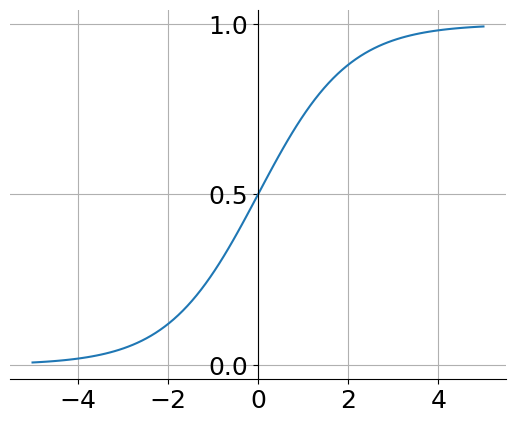

In [ ]:
# Visualizacion funcion
x = np.linspace(-5,5,100)
y = sigmoid(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x, y)
plt.locator_params(axis='y', nbins=3)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid()

## PROBLEMA A RESOLVER
La red neuronal debe predecir si una persona esta alegre, no alegre, o neutral en base a la musica que escucha. Los array son del tipo de musica y los index las caracteristicas cada estilo.

- 0: Clasica
- 1: Trap
- 2: Reguetton
- 3: Heavy Metal
- 4: Rock
- 5: Lento
- 6: Bachata

In [ ]:
# Determinamos los outputs: Alegre, no alegra o neutral
training_inputs = np.array([
    [0,0,1,1,0,1,1],
    [1,1,0,0,1,0,0],
    [1,0,1,0,0,1,0],
    [0,1,1,0,1,1,1],
    [1,0,0,1,1,0,0],
    [0,0,0,1,1,0,1],
    [1,1,1,1,0,0,0]
])

training_outputs = np.array([
    [1,1,1,0,1,0,1],
    [0,0,0,1,0,1,0],
    [1,1,0,0,0,0,1]
]).T

print("inputs: ", training_inputs)
print("outputs: ", training_outputs)

inputs:  [[0 0 1 1 0 1 1]
 [1 1 0 0 1 0 0]
 [1 0 1 0 0 1 0]
 [0 1 1 0 1 1 1]
 [1 0 0 1 1 0 0]
 [0 0 0 1 1 0 1]
 [1 1 1 1 0 0 0]]
outputs:  [[1 0 1]
 [1 0 1]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 1]]


In [ ]:
training_values = np.concatenate((training_inputs.T, training_outputs.T)).T
table = lambda arr : display(HTML(tabulate.tabulate(arr, tablefmt='html')))
table(training_values)

0,0,1,1,0,1,1,1,0,1
1,1,0,0,1,0,0,1,0,1
1,0,1,0,0,1,0,1,0,0
0,1,1,0,1,1,1,0,1,0
1,0,0,1,1,0,0,1,0,0
0,0,0,1,1,0,1,0,1,0
1,1,1,1,0,0,0,1,0,1


In [ ]:
# Synaptic weights
n = training_inputs.shape[1]
synaptic_weights = 2 + np.random.random((7, 3)) - 1

synaptic_weights

array([[1.417022  , 1.72032449, 1.00011437],
       [1.30233257, 1.14675589, 1.09233859],
       [1.18626021, 1.34556073, 1.39676747],
       [1.53881673, 1.41919451, 1.6852195 ],
       [1.20445225, 1.87811744, 1.02738759],
       [1.67046751, 1.4173048 , 1.55868983],
       [1.14038694, 1.19810149, 1.80074457]])

Funcion para conseguir un resultado entre los inputs y los synpatic weights:

$$\sum_{i=0}^{n}{x_iw_i}$$

Funcion para normalizar al rango 0, 1

Ejemplo: Inputs $x_i$ son `[1, 1, 1]` y Synpatic weights $w_i$ son `[[11.30926442], [-0.20511667], [-5.4500033]]`

Resultado:
$$[1 \times 11.30926442] + [1 \times (-0.20511667)] + [1 \times (-5.4500033)] = 5.6541444499999995$$

In [ ]:
eval_NN = lambda x, w: sigmoid(np.dot(x, w))

In [ ]:
for iteration in range(50000):
    input_layer = training_inputs

    # Suma los valores de entrada ponderados y aplica la sigmoide para normalizar entre -1 y 1.
    outputs = eval_NN(input_layer, synaptic_weights)

    # Error
    error = training_outputs - outputs

    # Ajustamos los pesos
    adjustments = error * sigmoid_derivative(outputs)
    synaptic_weights += np.dot(input_layer.T, adjustments)

In [ ]:
print('Synaptic weights after training')
print(synaptic_weights)

print('Outputs after training: ')
print(outputs)

Synaptic weights after training
[[ 10.76365122 -10.8408156    3.81133092]
 [  0.61011979  -0.53554187  19.45166853]
 [  2.25014728  -2.81764871  -4.20222566]
 [  5.39564078  -5.31847062  10.0622877 ]
 [ -5.97732794   5.97991629 -18.73005713]
 [  2.72058579  -2.15049169  -4.62730893]
 [ -5.03719436   4.95743355   3.34068036]]
Outputs after training: 
[[9.95175295e-01 4.82471444e-03 9.89782903e-01]
 [9.95487732e-01 4.51227626e-03 9.89365202e-01]
 [9.99999853e-01 1.36229185e-07 6.57297981e-03]
 [4.34809748e-03 9.95651894e-01 8.43217510e-03]
 [9.99962154e-01 3.79443840e-05 7.71818175e-03]
 [3.61561405e-03 9.96384378e-01 4.83475376e-03]
 [9.99999995e-01 3.35625318e-09 1.00000000e+00]]


In [ ]:
table(training_values)

0,0,1,1,0,1,1,1,0,1
1,1,0,0,1,0,0,1,0,1
1,0,1,0,0,1,0,1,0,0
0,1,1,0,1,1,1,0,1,0
1,0,0,1,1,0,0,1,0,0
0,0,0,1,1,0,1,0,1,0
1,1,1,1,0,0,0,1,0,1


In [ ]:
large = lambda x : display(HTML('<p style="font-size: 50px; color: #66D148">'+str(x)+'</p>'))

In [ ]:
a = 1 #@param {type:"integer"}
b = 0 #@param {type:"integer"}
c = 1 #@param {type:"integer"}
d = 0 #@param {type:"integer"}
e = 1 #@param {type:"integer"}
f = 0 #@param {type:"integer"}
g = 1 #@param {type:"integer"}

input_layer = np.array([a, b, c, d, e, f, g])
res = sigmoid(np.dot(input_layer, synaptic_weights))[0]
display(res)

thresh = 0.01
out = (res >= thresh).astype(int)
print(out)

0.8807210614868255

1


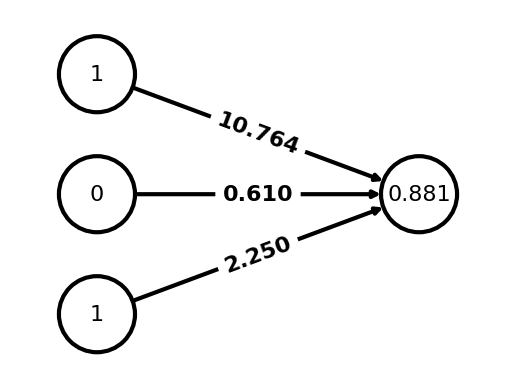

In [ ]:
G = nx.DiGraph()
layers = [[0, 1, 2], [3]]

rels = list(itertools.product(*layers))
flatten = lambda l: [x for i in l for x in i]

labels = {i: v for i, v in enumerate(input_layer)}
labels[3] = round(res, 3)

pos = {}
m = max([len(l) for l in layers])
for i, l in enumerate(layers):
    for j, v in enumerate(l):
        pos[v] = (i, len(l) - j)

if 3 in pos:
    pos[3] = (pos[3][0], pos[1][1])

weights_labels = {(ra, rb): "{:0.3f}".format(synaptic_weights[i][0]) for i, (ra, rb) in enumerate(rels)}

G.add_edges_from(rels)

valid_labels = {k: labels[k] for k in G.nodes if k in labels}

options = {
    "font_size": 16,
    "node_size": 3000,
    "node_color": [(1, 1, 1, 1) for _ in G.nodes],
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "labels": valid_labels,
    "connectionstyle": "arc3, rad=0",
}

nx.draw_networkx(G, pos, **options)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=weights_labels,
    font_color='black',
    font_size=16,
    font_weight='bold'
)

plt.axis('off')
ax = plt.gca()
ax.margins(0.20)
plt.show()

## BACK PROPAGATION
Es el proceso mediante el cual el modelo ajusta sus pesos en función del error obtenido en la predicción. A través de este proceso, la red neuronal aprende, minimizando la diferencia entre sus predicciones y los valores reales.

En este codigo se muestra de esta manera:


  adjustments = error * sigmoid_derivative(outputs)


  synaptic_weights += np.dot(input_layer.T, adjustments)

## FORWARD PROPAGATION
Los datos de entrada pasan a través de cada capa de la red hasta obtener una predicción final en la capa de salida. Involucra el cálculo de las salidas en cada neurona aplicando la función de activación correspondiente.

En este codigo se muestra de esta manera:


outputs = eval_NN(input_layer, synaptic_eights)

## ESTRUCTURA DE LA RED
La estructura de una red neuronal, también llamada arquitectura, está compuesta por capas. Las capas principales incluyen una capa de entrada (training inputs), varias capas ocultas, y una capa de salida (training outputs).


## FUNCION DE ACTIVACION
Son funciones matemáticas aplicadas a las neuronas que introducen no linealidad en la red. Las funciones de activación comunes incluyen ReLU, Sigmoid, y Softmax.

En este codigo se muestra de esta manera:


sigmoid = lambda x : 1 / ( 1 + np.exp(-x) )

sigmoid_derivative = lambda x : x * (1 - x)

## BONUS PUNTO A
Para permitir que la red neuronal tenga 'k' capas ocultas con 'n' neuronas en cada una hay que:
- Crear una lista de matrices de pesos para cada par de capas consecutivas en la red. Para conectar la capa de entrada con la primera capa oculta y las capas ocultas entre si y una matriz para conectar la ultima capa con la de salida.
- Forward Propagation (eval_NN): Hay que ajustarla para que recorrar todas las capas de la red. Se debe aplicar la funcion de activacion despues de cada matriz de peso y pasar el resultado a la siguiente capa.

## Parámetros

n_input = training_inputs.shape[1]  

n_hidden = n

n_output = training_outputs.shape[1]

k = k  

## Inicialización de pesos para cada capa

weights = []

weights.append(2 * np.random.random((n_input, n_hidden)) - 1)

for _ in range(1, k):
    weights.append(2 * np.random.random((n_hidden, n_hidden)) - 1)

weights.append(2 * np.random.random((n_hidden, n_output)) - 1)

## Forward Propagation

def eval_NN(x, weights):
    activations = x  
    for w in weights:
        activations = sigmoid(np.dot(activations, w))
    return activations  

## BONUS PUNTO B
Para resolver un problema de clasificación con 'm' clases mutuamente excluyentes, se debe hacer que la capa de salida tenga 'm' neuronas y una función de activación softmax en la salida, la cual garantiza que la red produzca probabilidades entre 0 y 1 para cada clase. Para esto hay que:
- Cambiar la cantidad de neuronas de la capa de salida a 'm'.
- Forward Propagation: Aplicar la funcion softmax en la capa de salida pero mantener la funcion sigmoide en las capas ocultas.
- One-Hot Encoding: Modificar los training outputs para que se representen con vectores de ceros y un unico uno en la posicion correspondiente a la clase.

n_output = m
    
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

def eval_NN(x, weights):

    activations = x
    for w in weights[:-1]:
        activations = sigmoid(np.dot(activations, w))
    output = softmax(np.dot(activations, weights[-1]))
    return output

training_outputs = np.eye(m)[label_indices]